In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import sem
import scipy.stats as stats

In [2]:
clinicaldata = "raw_data/clinicaltrial_data.csv"
mousedata = "raw_data/mouse_drug_data.csv"

In [3]:
clinicaldata_pd= pd.read_csv(clinicaldata)
mousedata_pd= pd.read_csv(mousedata)
clinicaldata_pd.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mousedata_pd.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [49]:
merge_table = pd.merge(mousedata_pd, clinicaldata_pd, on="Mouse ID", how="outer")
merge_table = merge_table.dropna(axis = 1,how="any")

merge_table = merge_table[["Drug","Timepoint", "Tumor Volume (mm3)"]]
#table = pivot_table(merge_table,)
#grouped_data1 = merge_table.groupby(['Drug',"Timepoint"])
table1 = pd.pivot_table(merge_table,values = "Tumor Volume (mm3)",index = ["Timepoint"],columns = ["Drug"],aggfunc=np.mean)
table1sem = pd.pivot_table(merge_table,values = "Tumor Volume (mm3)",index = ["Timepoint"],columns = ["Drug"],aggfunc=stats.sem)
table1sem.loc[15,"Capomulin"]

0.83861724729856901

In [50]:
table1sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [54]:
table1["Timepoint"] = [0,5,10,15,20,25,30,35,40,45]
timepoint = [0,5,10,15,20,25,30,35,40,45]


15

In [57]:
##This plots all of the drugs, problem is, you cannot really see much
# fig,ax = plt.subplots()
# colors = ["b","g","r","m","k","w",'#00008B','#FFEBCD','#FF8C00','#9932CC']
# markers = ["o","^","*","8","D","X","p","h","s","+"]


# for i in range(len(table1.columns)-1):
#     plt.scatter(table1["Timepoint"],table1[table1.columns[i]], marker = markers[i],facecolors =colors[i],edgecolors = "black")
    
# for i in range(len(table1.columns)-1):
#     (slope, intercept, _, _, _) = linregress(table1["Timepoint"], table1[table1.columns[i]])
#     fit = slope * table1["Timepoint"] + intercept
#   #  ax.plot(table1["Timepoint"],fit,colors[i],"--")
  
# plt.legend()
# plt.ylim(30,70)
# plt.show()

a= pd.DataFrame(table1sem["Capomulin"])
table1sem.loc[timepoint[i],table1.columns[i+5]]


0.53318230113007392

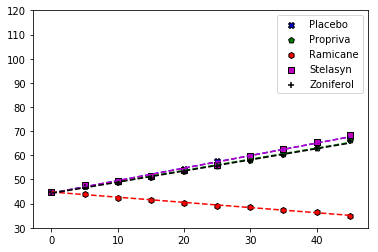

In [76]:
##This separates it into two graphs
fig,ax = plt.subplots()
colors = ["b","g","r","m","k","b","g","r","m","k"]
markers = ["o","^","*","8","D","X","p","h","s","+"]
for i in range(((len(table1.columns)-1)-((len(table1.columns)-1))//2)):
    plt.scatter(table1["Timepoint"],table1[table1.columns[i+5]], marker = markers[i+5],facecolors =colors[i+5],edgecolors = "black")
    z = np.polyfit(table1["Timepoint"],table1[table1.columns[i+5]], 1)
    p = np.poly1d(z)
    plt.plot(table1["Timepoint"],p(table1["Timepoint"]),colors[i+5]+"--")



plt.legend(loc = "best")
plt.ylim(30,120)
plt.show()

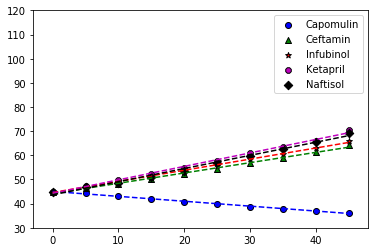

In [9]:
merge_table1 = pd.merge(mousedata_pd, clinicaldata_pd, on="Mouse ID", how="outer")
merge_table1 = merge_table1[["Drug","Timepoint","Metastatic Sites"]]

table2 = pd.pivot_table(merge_table1,values = "Metastatic Sites",index = ["Timepoint"],columns = ["Drug"],aggfunc=np.mean)
table2["Timepoint"] = [0,5,10,15,20,25,30,35,40,45]

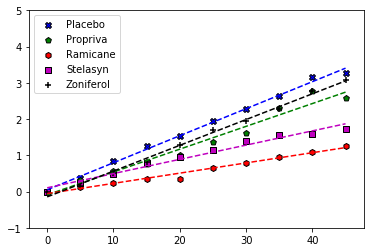

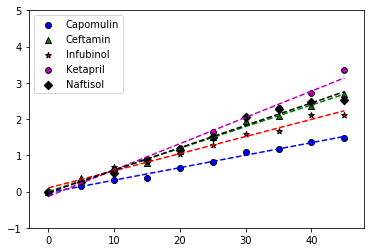

In [10]:
fig,ax = plt.subplots()
for i in range(((len(table2.columns)-1)-((len(table2.columns)-1))//2)):
    plt.scatter(table2["Timepoint"],table2[table2.columns[i+5]], marker = markers[i+5],facecolors =colors[i+5],edgecolors = "black")
    z = np.polyfit(table2["Timepoint"],table2[table2.columns[i+5]], 1)
    p = np.poly1d(z)
    plt.plot(table2["Timepoint"],p(table2["Timepoint"]),colors[i+5]+"--")



plt.legend(loc = "best")
plt.ylim(-1,5)
plt.show()



for i in range(((len(table2.columns)-1)-((len(table2.columns)-1))//2)):
    plt.scatter(table2["Timepoint"],table2[table2.columns[i]], marker = markers[i],facecolors =colors[i],edgecolors = "black")
    z = np.polyfit(table2["Timepoint"],table2[table2.columns[i]], 1)
    p = np.poly1d(z)
    plt.plot(table2["Timepoint"],p(table2["Timepoint"]),colors[i]+"--")

plt.legend(loc = "best")
plt.ylim(-1,5)
plt.show()

In [11]:
bins = [0,1, 5, 10, 15, 20,25,30,35,40,45]
group_names = ['0', '5', '10', '15','20','25','30','35','40','45']
#table1= pd.cut(grouped_data["Timepoint"], bins, labels=group_names)
grouped_data = grouped_data1[["Drug","Tumor Volume (mm3)"]]
#grouped_data["Drug"].unique()
grouped_data.mean()

NameError: name 'grouped_data1' is not defined

In [ ]:
table2.columns